# 4.1 Méthode des rectangles

    a) Choisir une fonction continue et définir la fonction Python f(x) correspondante. 

In [3]:
import numpy as np

def fct1(x):
    return np.exp(x**2)

    b) Écrire une fonction rectangles(f,a,b,N) qui retourne l'approximation de l'intégrale J

In [34]:
def rectangle(f, a, b, N):
    z = 0
    delta = float(b-a) / N
    x = a
    for i in range(0, N + 1):
        z += f(x) * delta
        x += delta
    return z

rectangle(fct1,0,1,10)

0.3849999999999999

        c) Réécrire la fonction rectangle avec un paramètre alpha de [0,1]

In [35]:
def rectangle2(f,a,b,N,alpha):
    if (alpha > 1) or (alpha < 0):
        return "Veuillez entrez une valeur appartenant à [0,1]"
    else :
        z = 0
        delta = float(b-a) / N
        x = a
        for i in range(0, N + 1):
            z += f(x) * delta
            x += delta
        return z
def f(x):
    return rectangle2(fct1,0,1,10,0.5)
    
  

    d) Représentation graphique d'une intégrale approximée par la méthode des rectangles 

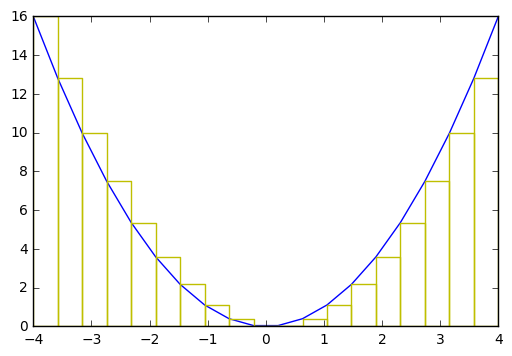

In [66]:
import matplotlib.patches as patches 

def plot_rectangle(f,a,b,N,alpha):
    delta = (b-a)/N
    x=np.linspace(a,b,50)
    fig=plt.plot(x,f(x))
    axes = fig[0].axes
    t=a
    while t<b:
        axes.add_patch(patches.Rectangle(
            (t,0),
            1/N,
            f(t+alpha*delta))

    e) Determiner empiriquement la vitesse de convergence 
    

In [59]:
%timeit rectangle(fct1, 2, 8, 5)

The slowest run took 11.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.57 µs per loop


    f) Determiner analytiquement la vitesse de convergence 

L’aire approchée obtenue par la méthode des rectangles converge vers l’intégrale de la fonction f(x) quand n tend vers l'infini. Car si f est une fonction de classe C1 sur [a,b] on peut majorer l'erreur par [M(b-a)^2]/2n où M est un majorant de |f'| sur [a,b].
La convergence est donc très lente. Il faudrait un ordre de grandeur de 10^1O intervalles pour obtenir une valeur approchée correcte à dix décimales près.

# 4.2 Méthode des trapèzes

    a) Écrire une fonction python trapezes(f,a,b,N) qui retourne l'approximation de l'intégrale J par la méthode des trapèzes

In [72]:
def trapezes(f,a,b,N):
    delta = (b-a)/float(N)
    z = 0.5*(f(a) + f(b))
    for i in range(1,N):
        z=+f(a+i*delta)
    return delta*z


    b) Vitesse de CV de manière analytique 

En prenant une fonction f(x) de classe C2 sur le segment [a,b], on peut majorer l'erreur par [M(b-a)^3]/(12n^2). On peut voir qu'elle convergence plus rapidement que la méthode des rectangles (grace au carré dans le dénominateur). Il faudrait environ 1O^5 intervalles pour obtenir une valeur approchée à dix décimales près.

    c) Determiner empiriquement la vitesse de convergence de la méthode des trapèzes 

In [73]:
%timeit trapezes(fct1, 2, 8, 5)

The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.44 µs per loop


# Méthode de Monte Carlo

    a) Écrire une fonction montecarlo(f,a,b,N) qui détermine une approximation de J par la méthode de Monte-Carlo. 

In [10]:
import numpy.random
import random
import math
import numpy

def montecarlo(f,a,b,N):
    x = a+(b-a)*numpy.random.random_sample(N)
    p = 1.0/(b-a)
    F = f(x)
    moyenne = F.sum()/(N*p)
    G = F**2
    variance = G.sum()*1.0/(N*p*p)-moyenne*moyenne
    return (moyenne)

montecarlo(fct1,0,1,20)

1.441544813985801

    b) Afficher la variance empirique aussi 

In [11]:
import numpy.random
import random
import math
import numpy

def montecarlo(f,a,b,N):
    x = a+(b-a)*numpy.random.random_sample(N)
    p = 1.0/(b-a)
    F = f(x)
    moyenne = F.sum()/(N*p)
    G = F**2
    variance = G.sum()*1.0/(N*p*p)-moyenne*moyenne
    return (moyenne,math.sqrt(variance/N)*1.96)

montecarlo(fct1,0,1,20)

(1.4621495639205768, 0.20221216305747494)

    c) Vitesse de CV empirique

In [13]:
%timeit montecarlo(fct1,0,1,20)

10.8 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


    d) Vitesse de CV analytique

# 4.4 Méthode de Simpson

    a) Déterminer la forme explicite du polynôme p_n



In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "polynome_pn.png")

# Le polynôme peut s'écrire de la forme suivante 

    b) Approximation d'une intégrale 

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "integrale_2.png")

# La valeur de l'intégrale 

    c)  Simplifier à la main la somme des J_n approchés 

    d) Écrire une fonction simpson(f,a,b,N) permettant de calculer une approximation de J avec la méthode de Simpson.

In [18]:
def simpson(f,a,b,N):
    delta = (b-a)/float(N)
    z=(f(a)+f(b))/6
    for i in range(1,N):
        z=z+f(a+i*delta)/3
    for i in range(N):
        z=z+f(a+(2*i+1)*delta/2)*2/3
    return delta*z

simpson(fct1,0,1,10)

1.4626536248862967

    e) Comparer la précision des méthodes des rectangles, des trapèzes et de Simpson en fonction de N


Pour l'exemple j'ai décidé de calculer la valeur de ln(2) en utilisant une intégrale. 

> Pour n = 3
    - Rectangles : 0.7833333333333333
    - Trapèzes : 0.7
    - Simpson : 0.6931697931697931
    
> Pour n = 10
    - Rectangles : 0.718771403175428
    - Trapèzes : 0.693771403175428
    - Simpson : 0.0.693147374665116

> Pour n = 1000
    - Rectangles : 0.6933972430599373
    - Trapèzes : 0.6931472430599374
    - Simpson : 0.6931471805599484


# 4.5 Module scipy.integrate

In [15]:
import math, scipy.integrate
def integrand(t, n, x):
    return math.exp(-x*t)/t**n
def E(n, x):
    return scipy.integrate.quad(integrand, 1, math.inf, args=(n, x))[0]
E(4,2)

0.025022841213644596